In [16]:
# modify the path to the dataset
df_ratings = pd.read_csv("/kaggle/input/campus-pride-index/pride_index.csv")
df_tags = pd.read_csv("/kaggle/input/campus-pride-index/pride_index_tags.csv")

In [17]:
print(len(df_ratings))
df_ratings.head()

238


,campus_name,campus_location,rating,students,community_type
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city
1,University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city
2,SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town
3,University at Buffalo,"Buffalo, NY",3.5,29850,medium city
4,Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community


In [18]:
print(len(df_tags))
df_tags.head()

238


,campus_name,campus_location,public,private,doctoral,masters,baccalaureate,community,residential,nonresidential,liberal_arts,technical,religious,military,hbcu,hispanic_serving,aapi_serving,other_minority_serving
0,"University of Maryland, College Park","College Park, MD",True,NaN,True,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,University of Michigan-Dearborn,"Dearborn, MI",True,NaN,True,True,True,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SUNY Westchester Community College,"Valhalla, NY",True,NaN,NaN,NaN,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
3,University at Buffalo,"Buffalo, NY",True,NaN,True,True,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Slippery Rock University,"Slippery Rock, PA",True,NaN,True,True,True,NaN,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df = pd.merge(df_ratings, df_tags, how="inner", on=["campus_name", "campus_location"])
df.head()

,campus_name,campus_location,rating,students,community_type,public,private,doctoral,masters,baccalaureate,...,residential,nonresidential,liberal_arts,technical,religious,military,hbcu,hispanic_serving,aapi_serving,other_minority_serving
0,"University of Maryland, College Park","College Park, MD",5.0,37952,large urban city,True,NaN,True,NaN,NaN,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
1,University of Michigan-Dearborn,"Dearborn, MI",3.0,9000,medium city,True,NaN,True,True,True,...,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SUNY Westchester Community College,"Valhalla, NY",4.0,13000,very small town,True,NaN,NaN,NaN,NaN,...,NaN,True,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN
3,University at Buffalo,"Buffalo, NY",3.5,29850,medium city,True,NaN,True,True,True,...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Slippery Rock University,"Slippery Rock, PA",4.0,8500,rural community,True,NaN,True,True,True,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [21]:
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df_encoded.head()

,rating,students,campus_name_Allegheny College,campus_name_Antioch College,campus_name_Appalachian State University,campus_name_Art Academy of Cincinnati,campus_name_Augsburg University,campus_name_Baldwin Wallace University,campus_name_Bard College at Simon's Rock,campus_name_Bates College,...,"campus_location_Wooster, OH","campus_location_Worcester, MA","campus_location_Yellow Springs, OH","campus_location_Ypsilanti, MI","campus_location_youngstown, OH",community_type_medium city,community_type_rural community,community_type_small city,community_type_small town,community_type_very small town
0,5.0,37952,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3.0,9000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.0,13000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,3.5,29850,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4.0,8500,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)
df_scaled

array([[ 1.24821891,  2.18229045, -0.06495698, ..., -0.68493489,
        -0.42904499, -0.23042861],
       [-1.20695547, -0.26189035, -0.06495698, ..., -0.68493489,
        -0.42904499, -0.23042861],
       [ 0.02063172,  0.07579697, -0.06495698, ..., -0.68493489,
        -0.42904499,  4.33973886],
       ...,
       [-1.20695547, -0.87394861, -0.06495698, ...,  1.45999279,
        -0.42904499, -0.23042861],
       [ 0.02063172,  0.20242971, -0.06495698, ..., -0.68493489,
        -0.42904499, -0.23042861],
       [-0.59316188, -0.9288228 , -0.06495698, ..., -0.68493489,
         2.33075791, -0.23042861]])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


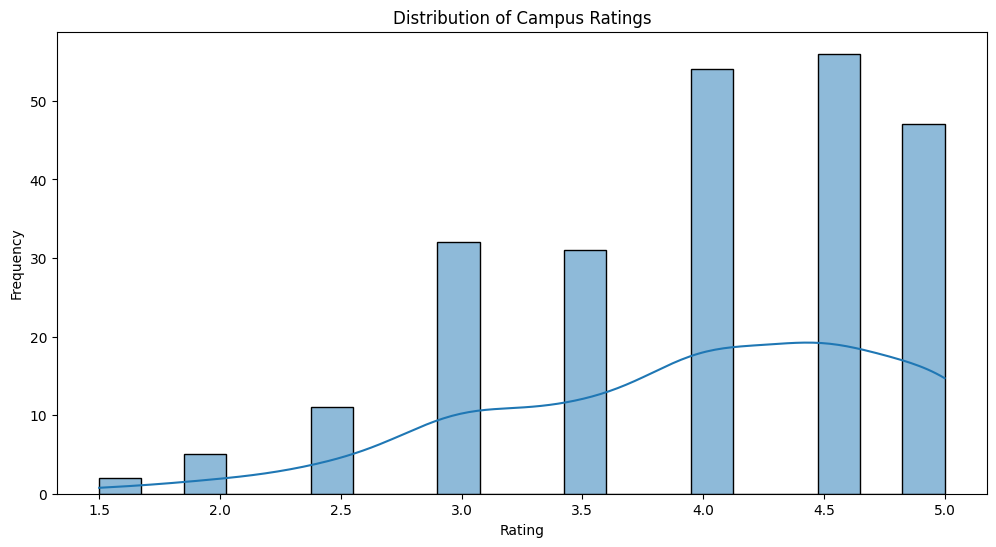

In [23]:
# Check the rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title('Distribution of Campus Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

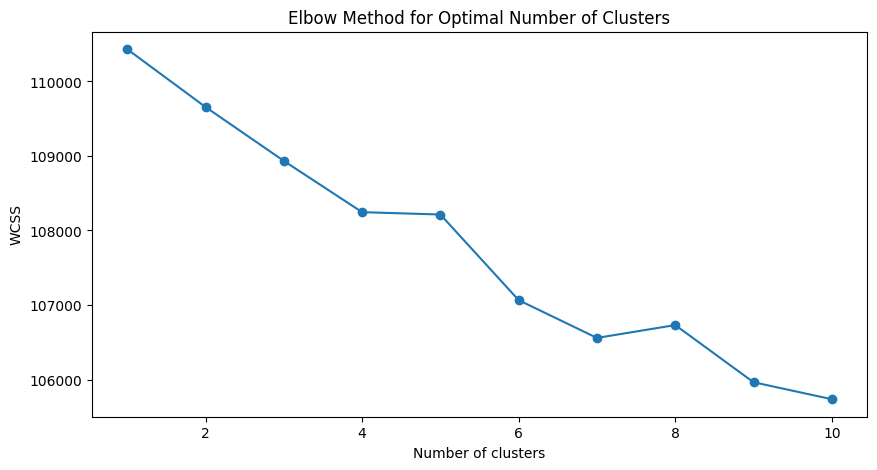

In [24]:
# Use elbow method to find the best k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

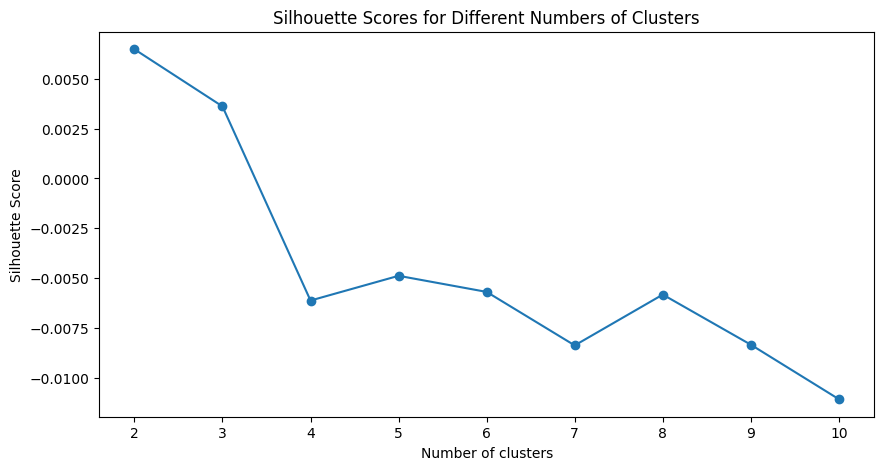

In [25]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

Silhouette Score for 4 clusters: -0.0061


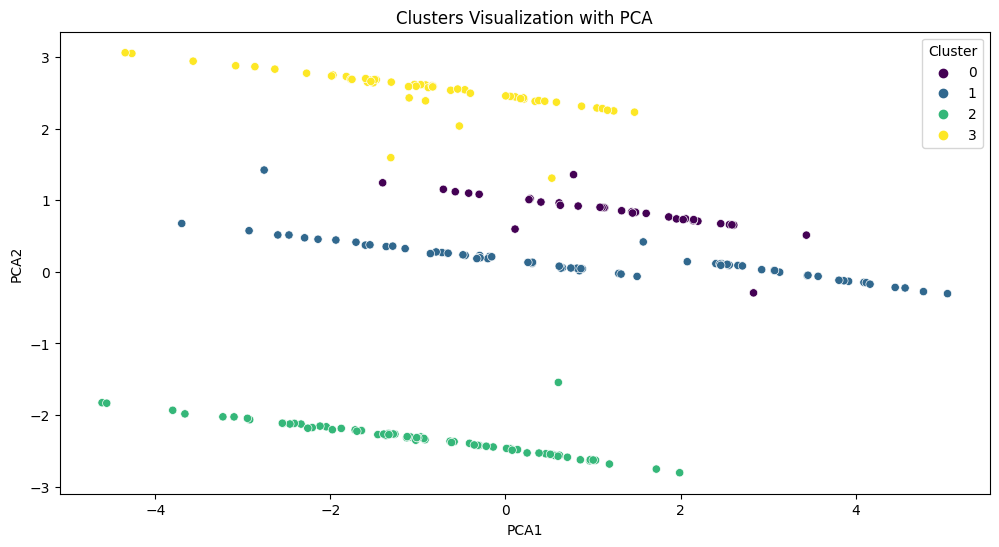

In [26]:
# Using k-means clustering
optimal_clusters = 4  # 4 is the optimal number of cluster according to the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled, df['Cluster'])
print(f'Silhouette Score for {optimal_clusters} clusters: {silhouette_avg:.4f}')

## Step 10: Visualize clusters using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)
df['PCA1'] = principal_components[:, 0]
df['PCA2'] = principal_components[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters Visualization with PCA')
plt.show()

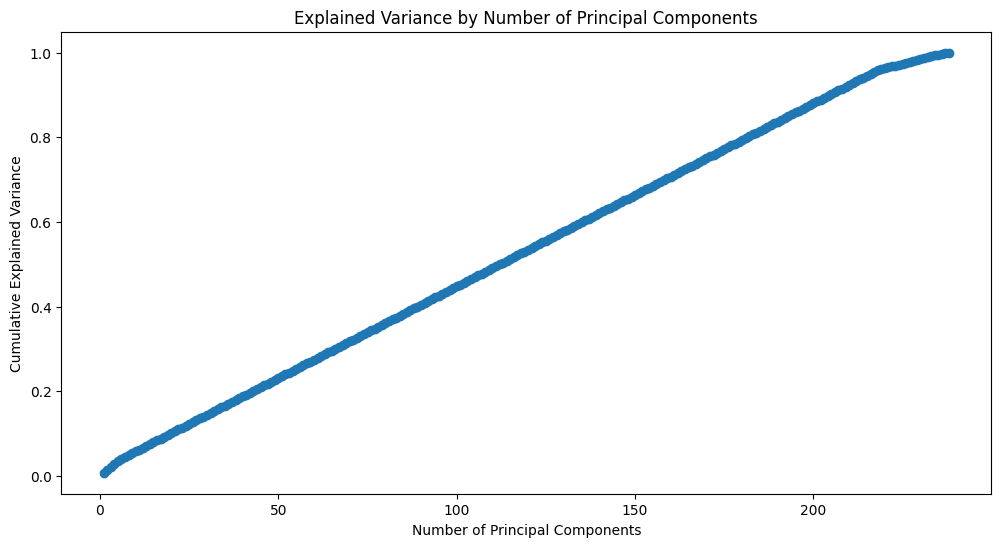

In [27]:
## Feature Importance using PCA
# Fit PCA on the scaled data
n_components = min(df_scaled.shape[0], df_scaled.shape[1])
pca_full = PCA(n_components=n_components)
pca_full.fit(df_scaled)

# Plot the explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca_full.explained_variance_ratio_) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Top Important Features:
                 Importance
campus_name        6.739285
campus_location    6.380422
community_type     0.026765
community          0.026765
rating             0.006762
students           0.005857


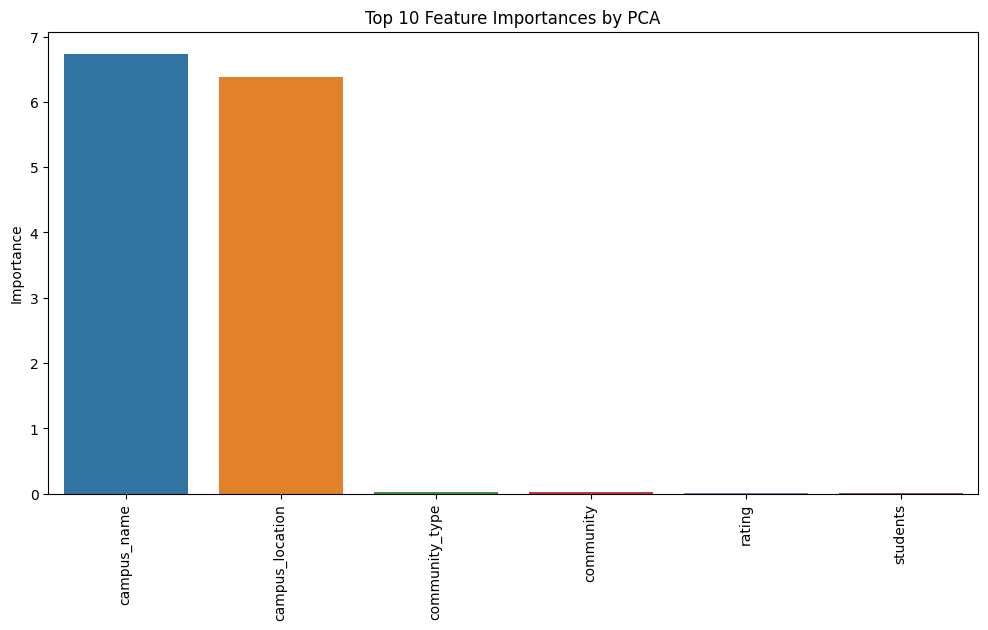

In [28]:
# Compute the feature importance
importance = pd.DataFrame(data=pca_full.components_.T, index=df_encoded.columns)
importance['Importance'] = np.mean(np.abs(importance), axis=1)

# Aggregate the importance of one-hot encoded features
original_features = df.columns
aggregated_importance = {}
for feature in original_features:
    if feature in df.select_dtypes(include=['object']).columns:
        # Sum the importance of all one-hot encoded columns for this feature
        related_columns = [col for col in df_encoded.columns if col.startswith(feature + '_')]
        if related_columns:
            aggregated_importance[feature] = importance.loc[related_columns, 'Importance'].sum()
    else:
        # Directly take the importance for numerical features
        if feature in importance.index:
            aggregated_importance[feature] = importance.loc[feature, 'Importance']

aggregated_importance_df = pd.DataFrame.from_dict(aggregated_importance, orient='index', columns=['Importance'])
aggregated_importance_df = aggregated_importance_df.sort_values(by='Importance', ascending=False)

print("Most Important Features:")
print(aggregated_importance_df)

plt.figure(figsize=(12, 6))
sns.barplot(x=aggregated_importance_df.head(10).index, y=aggregated_importance_df.head(10)['Importance'])
plt.xticks(rotation=90)
plt.title('Top 10 Feature Importances by PCA')
plt.show()